In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../bases_dados/census.csv')

In [3]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df['age'].max(), df['age'].min()

(90, 17)

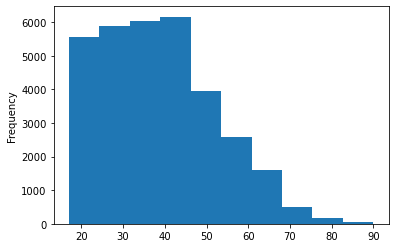

In [5]:
df['age'].plot.hist();

In [6]:
df['age'] = pd.cut(df['age'], bins=[0, 17, 25, 40, 60, 90], labels=['Faixa1', 'Faixa2', 'Faixa3', 'Faixa4', 'Faixa5'])

In [7]:
df.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
df['age'].unique()

['Faixa3', 'Faixa4', 'Faixa2', 'Faixa5', 'Faixa1']
Categories (5, object): ['Faixa1' < 'Faixa2' < 'Faixa3' < 'Faixa4' < 'Faixa5']

In [12]:
df_apriori = df[['age', 'workclass', 'education', 'marital-status', 'relationship', 'occupation', 'sex', 'native-country', 'income']]

In [13]:
df_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [14]:
df_apriori.shape

(32561, 9)

In [16]:
df_apriori = df_apriori.sample(n=1000)

In [17]:
df_apriori.shape

(1000, 9)

In [18]:
transacoes = []

for i in range(df_apriori.shape[0]):
    transacoes.append([str(df_apriori.values[i, j]) for j in range(df_apriori.shape[1])])

In [19]:
len(transacoes)

1000

In [20]:
transacoes[0]

['Faixa3',
 ' Private',
 ' HS-grad',
 ' Married-civ-spouse',
 ' Wife',
 ' Adm-clerical',
 ' Female',
 ' United-States',
 ' >50K']

In [21]:
from apyori import apriori

In [22]:
regras = apriori(transacoes, min_support=0.3, min_confidence=0.2)

resultados = list(regras)

In [23]:
len(resultados)

38

In [24]:
resultados[12]

RelationRecord(items=frozenset({' <=50K', ' Male'}), support=0.459, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K', ' Male'}), confidence=0.459, lift=1.0), OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Male'}), confidence=0.6039473684210527, lift=0.909559289790742), OrderedStatistic(items_base=frozenset({' Male'}), items_add=frozenset({' <=50K'}), confidence=0.6912650602409639, lift=0.909559289790742)])